`March, 9th 2022`

### **Data Visualization Exercise 3**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
# Set up max number of columns scrolled
pd.set_option('display.max_columns', 100)

# Load dataset
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
# Check the shape of df
df.shape

(13580, 21)

In [4]:
# Check df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
# Descriptive stats of numerical variables
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
# Set up runtime configuration (rc)

# Style
plt.style.use('ggplot')

# Figure size
plt.rcParams['figure.figsize'] = (10, 6)

# Font size
small = 10
medium = 12
large = 18

plt.rc('font', size = small)          # Controls default text sizes
plt.rc('axes', titlesize = small)     # Fontsize of the axes title
plt.rc('axes', labelsize = medium)    # Fontsize of the x and y labels
plt.rc('xtick', labelsize = small)    # Fontsize of the tick labels
plt.rc('ytick', labelsize = small)    # Fontsize of the tick labels
plt.rc('legend', fontsize = small)    # Legend fontsize
plt.rc('figure', titlesize = large)   # Fontsize of the figure title


**1. Tampilkan visualisasi yang menggambarkan persebaran harga rumah secara keseluruhan!**

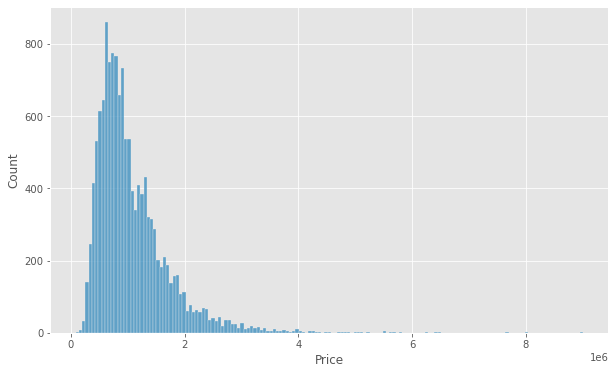

In [7]:
# Histogram dengan jumlah bin secara default
sns.histplot(df['Price']);

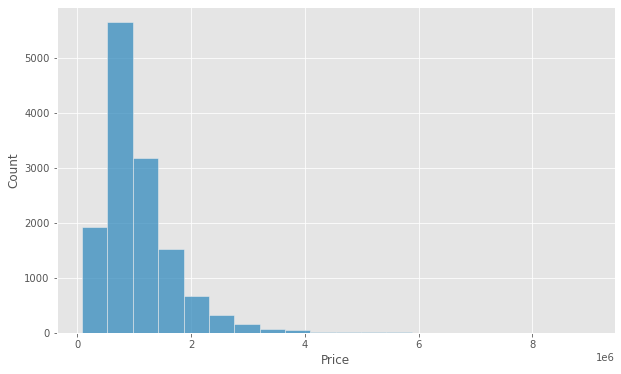

In [8]:
# Histogram dengan jumlah bin sesuai user
sns.histplot(df['Price'], bins=20 , kde=False);

In [9]:
# Define range nilai untuk xticks
x_tick = np.linspace(0, 9000000, 21)
x_tick

array([      0.,  450000.,  900000., 1350000., 1800000., 2250000.,
       2700000., 3150000., 3600000., 4050000., 4500000., 4950000.,
       5400000., 5850000., 6300000., 6750000., 7200000., 7650000.,
       8100000., 8550000., 9000000.])

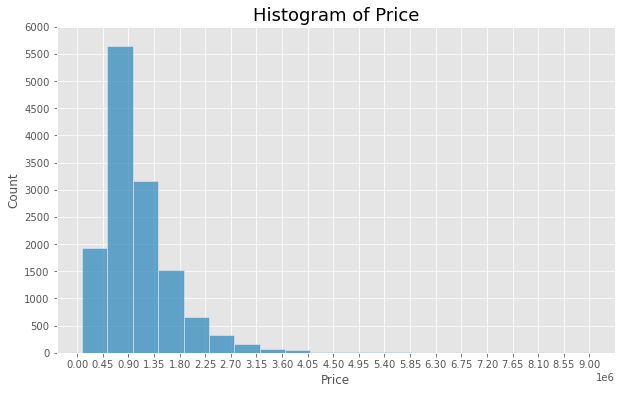

In [10]:
# Untuk batas tiap bin 
x_tick = x_tick
y_tick = np.arange(0, 6001, 500)

ax = sns.histplot(df['Price'], bins=20, kde=False)
ax.set_xticks(x_tick)
ax.set_yticks(y_tick)

plt.title('Histogram of Price', fontdict={'size':18})
plt.xticks(fontsize=10);

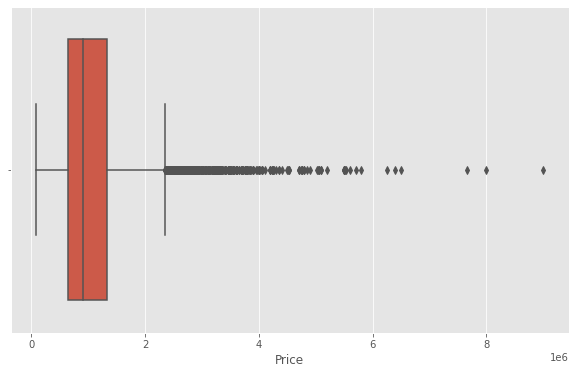

In [11]:
# Boxplot untuk melihat distribusi harga rumah
sns.boxplot(x=df['Price']);

In [12]:
# Cek descriptive stats Price 
df.describe()[['Price']].tail()

,Price
min,85000.0
25%,650000.0
50%,903000.0
75%,1330000.0
max,9000000.0


**2. Tampilkan visualisasi yang menggambarkan rata-rata harga rumah berdasarkan Region Name! Urutkan regionnya dari yang memiliki rata-rata harga rumah paling tinggi ke rendah.**

In [13]:
# Cek jumlah region
df['Regionname'].nunique()

8

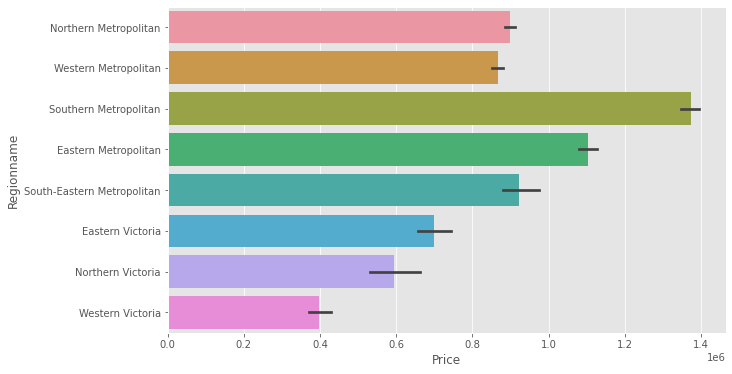

In [14]:
# Plot harga rumah per region
sns.barplot(data=df, y='Regionname', x='Price');

In [15]:
# Menampilkan data rata-rata harga rumah untuk tiap region
price_region = df.groupby(by='Regionname', as_index=False).mean()[['Regionname','Price']].sort_values(by='Price', ascending=False)
price_region

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


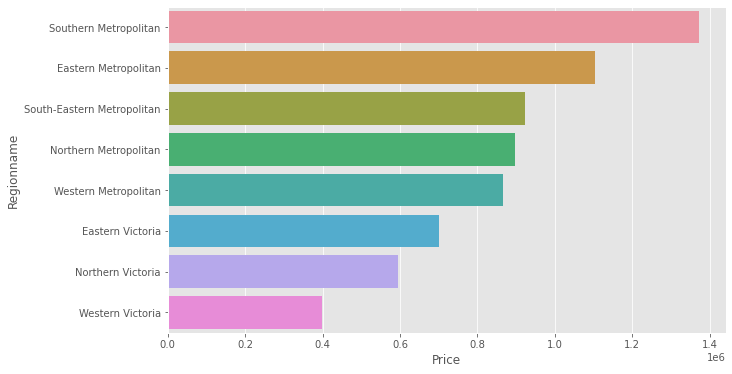

In [16]:
# Barplot untuk mengetahui rata-rata harga rumah dari tiap region
sns.barplot(data=price_region, y='Regionname', x='Price');

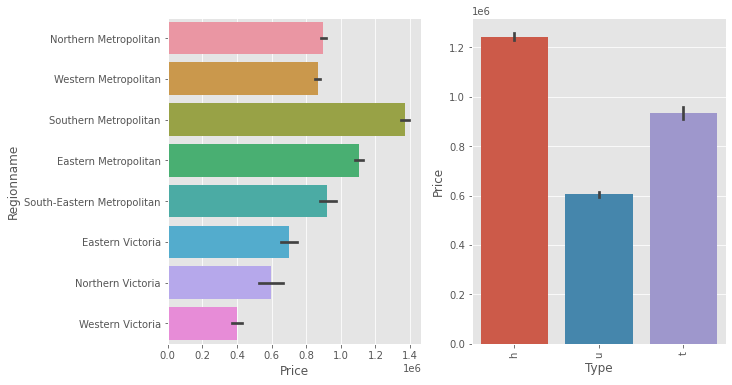

In [17]:
fig, axes = plt.subplots(1, 2)

sns.barplot(data=df, y='Regionname', x='Price', ax=axes[0])
plt.xticks(rotation=90)

sns.barplot(data=df, x='Type', y='Price', ax=axes[1]);

**3. Tampilkan visualisasi yang menggambarkan jumlah rumah untuk tiap tipe rumah!**

In [18]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

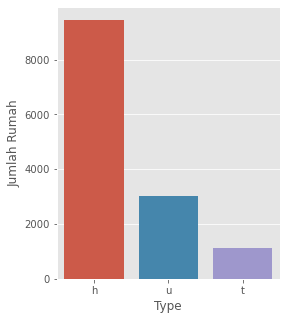

In [19]:
# Jumlah rumah untuk tiap tipe
plt.figure(figsize=(4, 5))
sns.countplot(data=df, x='Type')
plt.ylabel('Jumlah Rumah');

In [42]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Period'],
      dtype='object')

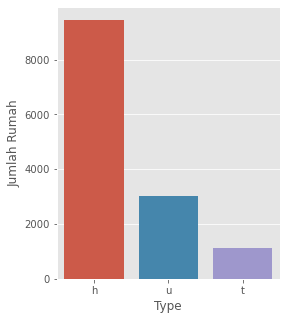

In [46]:
# Cara lain menggunakan barplot dengan estimator = len
plt.figure(figsize=(4, 5))
sns.barplot(data=df, x='Type', y='Price', estimator=len) # Jika menggunakan cara ini, axis y hanya formalitas.
plt.ylabel('Jumlah Rumah');

**4. Tampilkan visualisasi yang menunjukkan nilai korelasi antara variabel 'Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt'!**

**Variabel apa yang memiliki korelasi paling kuat dengan harga rumah?**

In [21]:
df_corr = df[['Rooms', 'Price', 'Distance', 'BuildingArea', 'YearBuilt']].corr('spearman')
df_corr

,Rooms,Price,Distance,BuildingArea,YearBuilt
Rooms,1.000000,0.539886,0.351416,0.775193,-0.072058
Price,0.539886,1.000000,-0.129990,0.631425,-0.368080
Distance,0.351416,-0.129990,1.000000,0.287116,0.228634
BuildingArea,0.775193,0.631425,0.287116,1.000000,0.003002
YearBuilt,-0.072058,-0.368080,0.228634,0.003002,1.000000


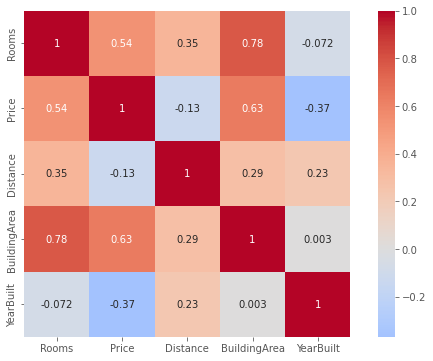

In [22]:
# Heatmap untuk visualisasi correlation coefficient
sns.heatmap(df_corr, annot=True, center=0, square=True, cmap="coolwarm");

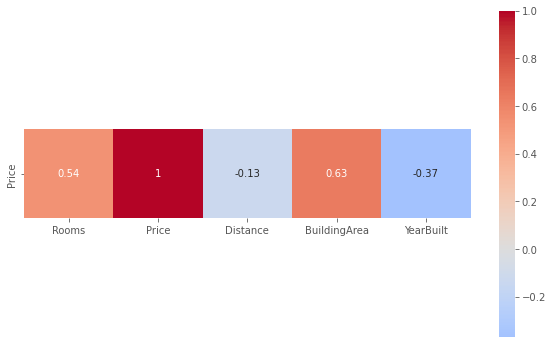

In [23]:
# Mencari variabel yang paling berkorelaasi dengan Price
sns.heatmap(df_corr.loc[['Price']], annot=True, center=0, square=True, cmap="coolwarm");

**5. Tampilkan visualisasi yang menggambarkan korelasi antara variabel BuildingArea dan Price!**<br>

`Sebelum divisualisasikan, hapus dahulu (sementara) rumah dengan Building Area lebih dari 2000 m2.`

In [24]:
# Correlation Price vs BuildingArea
df.corr('spearman')['Price']['BuildingArea']

0.6314247475827348

In [25]:
# Outliers
outliers = df[df['BuildingArea'] > 2000].index

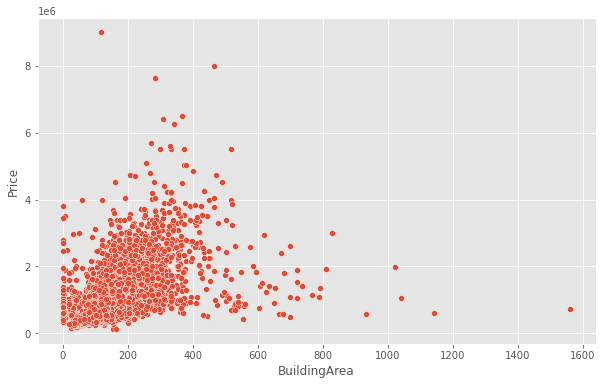

In [26]:
sns.scatterplot(data=df.drop(index=outliers), x='BuildingArea', y='Price');

**6. Dari visualisasi nomor sebelumnya, tambahkan variabel tipe rumah ke dalam visualisasi sehingga korelasi antara luas bangunan dan harga rumah juga dapat diobservasi berdasarkan tipenya!**

`h - house,cottage,villa, semi, terrace`<br>
`u - unit, duplex`<br>
`t - townhouse`

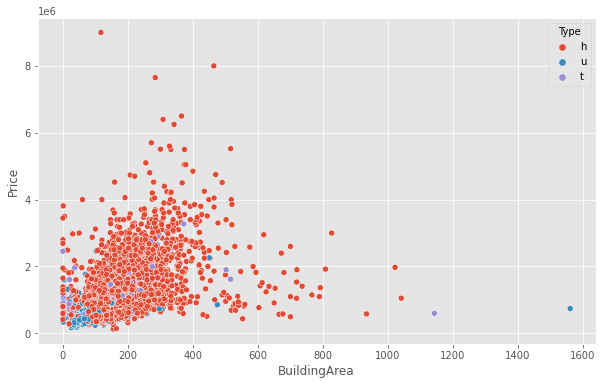

In [27]:
# Menambahkan parameter hue = Type
sns.scatterplot(data=df.drop(index=outliers), x='BuildingArea', y='Price', hue='Type');

In [28]:
df['Type'].value_counts()

h    9449
u    3017
t    1114
Name: Type, dtype: int64

**7. Tampilkan visualisasi yang menggambarkan perubahan jumlah rumah yang dijual dari Jan 2016 - Des 2017!**

In [29]:
# Ubah column Date dari object ke datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [48]:
# Ekstrak bulan dan tahunnya saja
df['Period'] = pd.to_datetime(df['Date']).dt.to_period('M').apply(lambda x: str(x))
df['Period']

0        2016-03
1        2016-04
2        2017-04
3        2017-04
4        2016-04
          ...   
13575    2017-08
13576    2017-08
13577    2017-08
13578    2017-08
13579    2017-08
Name: Period, Length: 13580, dtype: object

In [32]:
# Jumlah rumah yang dijual per-bulan (Jan 2016 - Des 2017)
df_monthly_sold = df.groupby('Period', as_index=False).count()[['Period', 'Price']].rename(columns={'Price': '# House Sold'})
df_monthly_sold

,Period,# House Sold
0,2016-01,2
1,2016-03,496
2,2016-04,558
3,2016-05,654
4,2016-06,626
5,2016-07,885
6,2016-08,813
7,2016-09,482
8,2016-10,854
9,2016-11,628


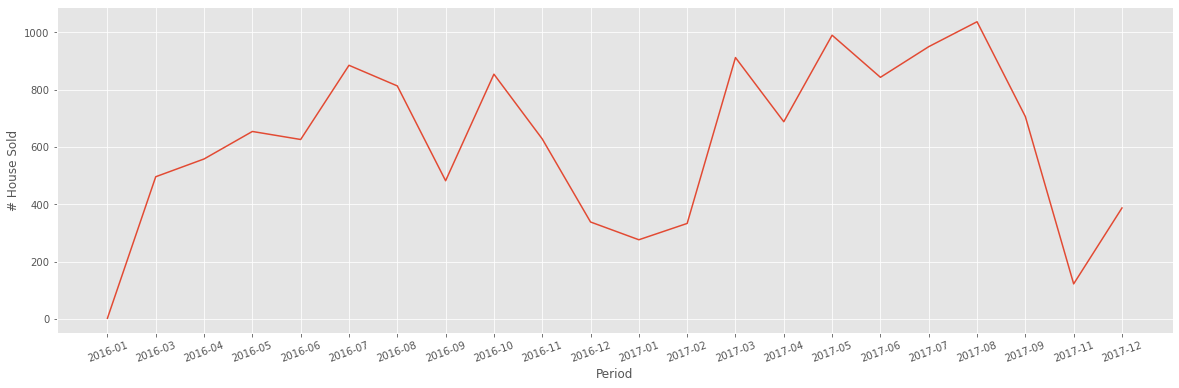

In [34]:
# Plot ke dalam lineplot karena berhubungan dengan time-series
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_monthly_sold, x='Period', y='# House Sold')
plt.xticks(rotation=20);

**8. Tampilkan visualisasi yang menggambarkan perbandingan dari persebaran harga rumah
berdasarkan tipe rumah!**

**Rumah di harga berapa untuk sebuah rumah bertipe "t" (townhouse) bisa dikatakan sebagai outlier?**

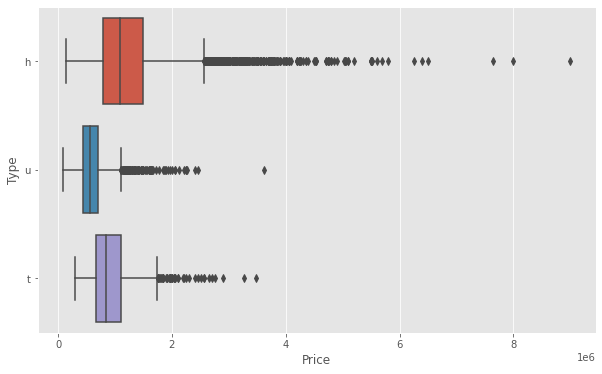

In [35]:
sns.boxplot(x=df['Price'], y='Type', data=df);

In [36]:
# Cek harga rumah type t
df_type_t = df[df['Type']=='t'][['Price']]
df_type_t

,Price
21,900000.0
38,840000.0
42,700000.0
48,450000.0
56,700000.0
...,...
13437,655000.0
13485,1655000.0
13504,1035000.0
13521,2455000.0


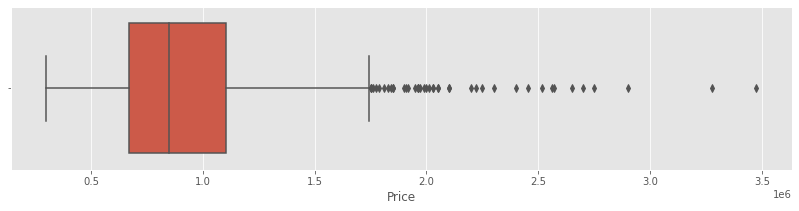

In [37]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df_type_t['Price']);

In [38]:
# Mencari outliers untuk properties tipe t
q1 = df_type_t['Price'].quantile(0.25)
q3 = df_type_t['Price'].quantile(0.75)

IQR = q3 -q1
IQR 

upper = q3 + 1.5*IQR

print(f'Sebuah rumah bertipe "t" dapat dikatakan sebagai outlier jika harganya > AUD$ {upper}')

Sebuah rumah bertipe "t" dapat dikatakan sebagai outlier jika harganya > AUD$ 1749750.0


**9. Tampilkan lokasi rumah yang harganya paling mahal!**

`- Tandai dengan dengan icon pin warna merah.`<br>
`- Ketika mouse diarahkan ke lokasi rumah, akan keluar tulisan 'The most expensive house' dan kalau diklik akan keluar alamatnya!`

In [39]:
# Cek harga rumah termahal
df[df['Price'] == df['Price'].max()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Period
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,2017-07


In [53]:
# Plot peta dengan koordinat tertentu
most_expensive_house = folium.Map(location=[-37.93168, 145.16126], zoom_start=15)

# # Opsi lain untuk define popup
# iframe = folium.IFrame('Address: 35 Bevis St')
# myPopup = folium.Popup(iframe, min_width=105, max_width=0)

# Untuk icon
myIcon = folium.Icon(color='red', icon='info-sign')

# Buat marker
folium.Marker(
    location  = [-37.93168, 145.16126], 
    popup     = '<a href="https://en.wikipedia.org/wiki/Melbourne">Address: 35 Bevis St"</a>',
    tooltip   = 'The most expensive house in Melbourne',
    icon      = myIcon
).add_to(most_expensive_house)

most_expensive_house

<hr>